## Explore fits spectra from Calspec
============================================

- author : Sylvie Dagoret-Campagne
- creation date June 16th 2016

The purpose is to view the spectrum of the stars measured in Monocam 

ftp://ftp.stsci.edu/cdbs/current_calspec/


In [200]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [201]:
from astropy.io import fits

In [202]:
import os

In [203]:
path='/Users/dagoret-campagnesylvie/iraf/hdstar_images'

/Users/dagoret-campagnesylvie/iraf/hdstar_images>ls
- hd158485_stis_001.fits	
- hd158485_stis_002.fits	
- hd158485_stis_003.fits
- hd159222_stis_001.fits
- hd159222_stis_002.fits
- hd159222_stis_003.fits
- hd163466_stis_001.fits
- hd163466_stis_002.fits
- hd163466_stis_003.fits

In [204]:
#basefilename='hd158485_stis_003.fits'
#basefilename='hd159222_stis_003.fits'
basefilename='hd163466_stis_002.fits'

In [205]:
file=os.path.join(path,basefilename)

In [206]:
#fits.tabledump(file) # Not working

In [207]:
hdulist=fits.open(file)

In [208]:
hdulist.info()

Filename: /Users/dagoret-campagnesylvie/iraf/hdstar_images/hd163466_stis_002.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   ()              
1    SCI         BinTableHDU     39   4685R x 7C   [1E, 1E, 1E, 1E, 1E, 1I, 1E]   


## Primary extension

In [209]:
hdulist[0].header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                   16 / Bits per pixel                                 
NAXIS   =                    0 / Number of axes                                 
EXTEND  =                    T / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2015-01-06T17:00:20' / Date FITS file was generated                  
IRAF-TLM= '2015-01-06T17:00:24' / Time of last modification                     
TARGETID= 'HD163466'           /                                                
DBTABLE = 'CRSPECTRUM'         /                                                
AIRMASS =              0.00000 /mean airmass of the observation                 
DESCRIP = 'Standard star flux with a new STIS calibration-------' /             
SOURCE  = 'Flux scale of Bohlin & Gordon Review, in prep.' /                    
SOURCE2 = 'Bohlin 2010, AJ, 

In [210]:
print hdulist[0].header.keys()

['SIMPLE', 'BITPIX', 'NAXIS', 'EXTEND', 'ORIGIN', 'DATE', 'IRAF-TLM', 'TARGETID', 'DBTABLE', 'AIRMASS', 'DESCRIP', 'SOURCE', 'SOURCE2', 'USEAFTER', 'COMMENT', 'PEDIGREE', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'FILENAME', 'WMIN', 'WMAX', '', '', '', '', '', '', '', '', '', '']


## Secondary extension

In [211]:
hdulist[1].header

XTENSION= 'BINTABLE'           /Written by IDL:  Tue Feb 25 10:45:19 2014       
BITPIX  =                    8 /                                                
NAXIS   =                    2 /Binary table                                    
NAXIS1  =                   26 /Number of bytes per row                         
NAXIS2  =                 4685 /Number of rows                                  
PCOUNT  =                    0 /Random parameter count                          
GCOUNT  =                    1 /Group count                                     
TFIELDS =                    7 /Number of columns                               
EXTNAME = 'SCI     '           /                                                
EXTVER  =                    1 /                                                
INHERIT =                    T /                                                
TFORM1  = '1E      '           /Real*4 (floating point)                         
TTYPE1  = 'WAVELENGTH'      

In [212]:
table_data=hdulist[1].data

In [213]:
wavelength=table_data['WAVELENGTH'] # in Angstrom

In [214]:
table_data.columns  # shows the columns names of the table

ColDefs(
    name = 'WAVELENGTH'; format = '1E'; unit = 'ANGSTROMS'; disp = 'G10.4'
    name = 'FLUX'; format = '1E'; unit = 'FLAM'; disp = 'E12.4'
    name = 'STATERROR'; format = '1E'; unit = 'FLAM'; disp = 'E12.4'
    name = 'SYSERROR'; format = '1E'; unit = 'FLAM'; disp = 'E12.4'
    name = 'FWHM'; format = '1E'; unit = 'ANGSTROMS'; disp = 'G6.2'
    name = 'DATAQUAL'; format = '1I'; unit = 'NONE'; disp = 'I2'
    name = 'TOTEXP'; format = '1E'; unit = 'SEC'; disp = 'G10.2'
)

In [215]:
wavelengths=table_data.field('WAVELENGTH')

In [216]:
fluxes=table_data.field('FLUX')

SED_hd163466_stis_002.pdf


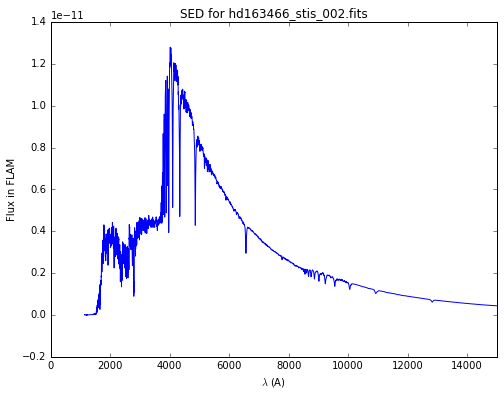

In [217]:
plt.figure(figsize=(8.,6.))
plt.plot(wavelengths,fluxes)
title='SED for {}'.format(basefilename)
figfilename='SED_{}'.format(basefilename.split('.')[0])+'.pdf'
print figfilename
plt.xlabel('$\lambda$ (A)')
plt.ylabel('Flux in FLAM')
plt.title(title)
plt.xlim(0.,15000.)
plt.savefig(figfilename)